# Project 1: Predicting Penguin species 

#### by: Elmira Onagh



### Citation 1

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism
and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS
ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

the data is taken from [here](https://github.com/allisonhorst/palmerpenguins/blob/master/README.md)


### Citation 2

The codes used for formatting purposes are taken from the material covered in the lecture by Prof. Archit Garg

### Citation 3

Learning curve sections: citation: https://www.dataquest.io/blog/learning-curves-machine-learning/

### Variables

- **species** (str) - penguin species (Chinstrap, Adélie, or Gentoo) --> Target variable
- **culmen_length_mm** (float) - culmen length in mm  --> continuous 
- **culmen_depth_mm** (float) - culmen depth in mm  --> continuous 
- **flipper_length_mm** (float) - flipper length in mm --> continuous 
- **body_mass_g** (float) - body mass in g  --> continuous
- **island** (str) - island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) -->categorical
- **sex** (str) - penguin sex  --> categorical

## **Part I: Exploratory Data Analysis**

### Reading data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

data = pd.read_csv('penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


**Note: data for one Adelie species is missing (row 3)

### Exploring Continuous features

To explore continuous features we are going to drop the categorical features: `island` and `sex`

In [2]:
cat_feat = ['island', 'sex']
data.drop(cat_feat, axis=1, inplace=True)
data.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0


In [3]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


based on the information on GitHub page (and the CSV file) the data set contains information on 344 penguins. Therefore, having the count 342 for each of continuous feature indicates that there are missing data for two data point (for 2 penguins)

In [4]:
data.groupby('species').mean()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


By grouping the data based on the species and calculating the mean, we notice few things:
- Adelie species have shorter culmen length, wider culmen depth, shorter flippers and lighter body mass than  Gentoo.  
- Adelie's only difference with Chinstrap is in their culmen length where Adelie has shorter culmen than Chinstrap.
- On the other hand the only similarity between Gentoo and Chinstrap is in their culmen length and the two differ in every other feature. 

One strategy to differentiate between three species would be to first group the given example/penguin in either Adelie or Chinstrap+Gentoo based on its `culmen_length` then distinguish between Chinstrap and Gentoo species based on either `culmen_depth`, `flipper_length`, or `body_mass`. 


#### Plotting continuous features

Text(0.5, 1.0, 'culmen lenght (mm) by species')

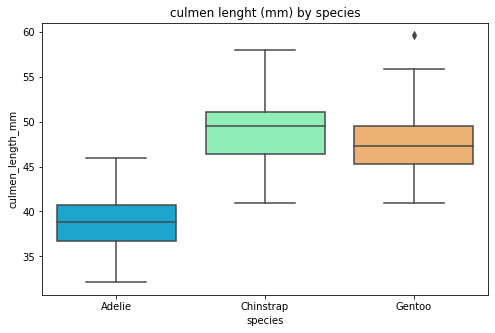

In [10]:
#plotting culmen lenght for each species
plt.figure(figsize=(8,5))
sns.boxplot(x='species',y='culmen_length_mm',data=data, palette='rainbow')
plt.title("culmen lenght (mm) by species")

box-plots have about same length suggesting that the culmen length for each species is evenly distributed. we can see that the Adelie species are fairly separated from the other two species and the data is normal. 
Two things to note are:
1. data for the chinstrap species is slightly skewed to left 
2. there is one outlier present in the Gentoo dataset. 

Text(0.5, 1.0, 'culmen depth (mm) by species')

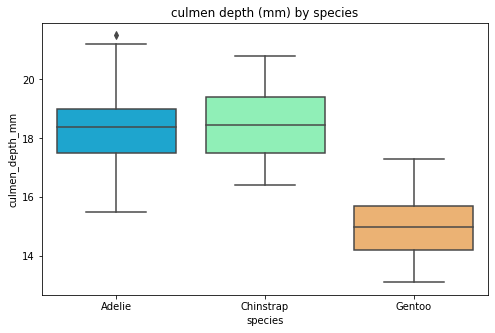

In [11]:
#plotting culmen depth for each species
plt.figure(figsize=(8,5))
sns.boxplot(x='species',y='culmen_depth_mm',data=data, palette='rainbow')
plt.title("culmen depth (mm) by species")

We can see that the Chinstrap species has slightly wider range when it comes to culmen depth than other two species. other than that the data is fairly distributed. The Gentoo species is reasonably separated from Adelie and Chinstrap which have a very close median. Final thing to note is the presence of one outlier in the Adelie dataset. 

Text(0.5, 1.0, 'Flipper length (mm) by species')

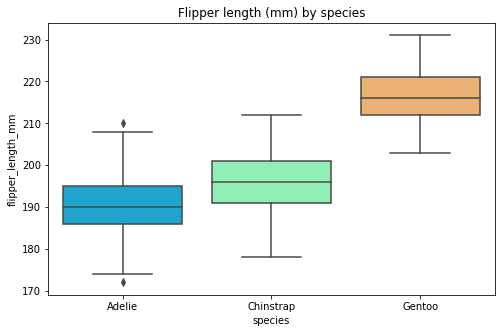

In [12]:
#plotting flipper length for each species
plt.figure(figsize=(8,5))
sns.boxplot(x='species',y='flipper_length_mm',data=data, palette='rainbow')
plt.title("Flipper length (mm) by species")

The Gentoo species is separated from other two species in this feature like in culmen_depth. Adelie and Chinstrap again have a fairly close median to each other with Adelie having two outlier in either high and low end of the data

Text(0.5, 1.0, 'Body Mass(g) by species')

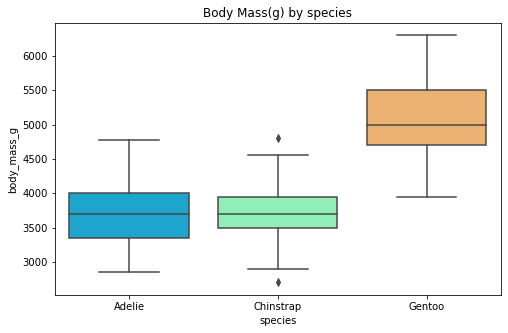

In [13]:
#plotting body mass for each species
plt.figure(figsize=(8,5))
sns.boxplot(x='species',y='body_mass_g',data=data, palette='rainbow')
plt.title("Body Mass(g) by species")

As for the body mass, Gentoo species is one more time distinguished from the other two. Adelie and Chinstrap species have similar median with the difference that the Chinstrap species' body mass is more closely concentrated around the median than Adelie's. One final thing that the graph tells is the presence of two outlier in high and low ends of Chinstrap data. 

In conclusion, except few outliers our data set is fairly distributed evenly. We can use the culmen length to differentiate between Adelie and the other two species. to differentiate between Chinstrap and Gentoo we can use either `culmen_depth`, `flipper_length`, or `body_mass` (if the computation is expensive or use all three if the computation is possible)

In [14]:
data.groupby(data['culmen_length_mm'].isnull()).head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0
339,Gentoo,NaN,NaN,NaN,NaN


by grouping the data using culmen_length to find the two missing data, we notice that one missing data was for Adelie and the other was for Gentoo species. In both cases all the continuous features were missing justifying the missing values for the other features. 
There is no indication that missing values are correlated with specific continuous feature or the target variable so we can conclude that these values are missing at random. In the next steps we fill the missing values with average of their corresponding feature. 

In [15]:
data['culmen_length_mm'].fillna(data['culmen_length_mm'].mean(), inplace=True) 
data['culmen_depth_mm'].fillna(data['culmen_depth_mm'].mean(), inplace=True) 
data['flipper_length_mm'].fillna(data['flipper_length_mm'].mean(), inplace=True) 
data['body_mass_g'].fillna(data['body_mass_g'].mean(), inplace=True) 
data.isnull().sum() 

species              0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [16]:
data.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.10000,18.70000,181.000000,3750.000000
1,Adelie,39.50000,17.40000,186.000000,3800.000000
2,Adelie,40.30000,18.00000,195.000000,3250.000000
3,Adelie,43.92193,17.15117,200.915205,4201.754386
4,Adelie,36.70000,19.30000,193.000000,3450.000000


We see that one of the rows of missing data (row 3) is replaced with the average values of each feature. 

### Exploring Categorical features

In [17]:
data = pd.read_csv('penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


to explore categorical features, first we drop all the continuous features: `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g`

In [18]:
con_feat = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
data.drop(con_feat, axis=1, inplace=True )
data.head()

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,NaN
4,Adelie,Torgersen,FEMALE


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   species  344 non-null    object
 1   island   344 non-null    object
 2   sex      334 non-null    object
dtypes: object(3)
memory usage: 8.2+ KB


By using info() method we can see that all the features are objects. There are no missing values for the `island` feature but 10 values are missing in the `sex` feature. In the next step, we have to see whether this values are missing randomly or not:

In [20]:
data.groupby(data['sex'].isnull()).head(10)

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,NaN
4,Adelie,Torgersen,FEMALE
5,Adelie,Torgersen,MALE
6,Adelie,Torgersen,FEMALE
7,Adelie,Torgersen,MALE
8,Adelie,Torgersen,NaN
9,Adelie,Torgersen,NaN


We can see that most of missing values for `sex` feature are for Adelie species in Torgersen island(5). There are also values missing for Adelie in other islands and some missing values for Gentoo as well suggesting that these missing values are mostly random. 

Since `sex` feature does not affect the species of a penguin, this missing values are irrelevant and we can ignore the `sex` feature all together and only focus on `island`.


#### Plotting categorical features

We are going to use count plot of each species in each island to see how they are distributed based on their recorded island:

Text(0.5, 1.0, 'Count of each species in each island')

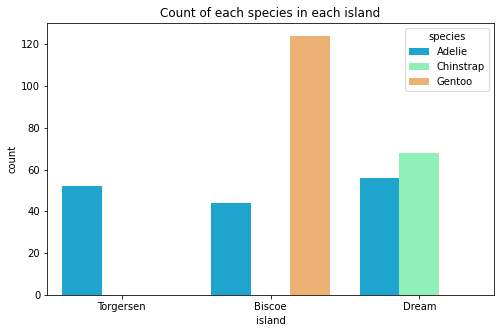

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='island',data=data, palette='rainbow',hue='species')
plt.title("Count of each species in each island")

Based on the count-plot above we can see that Adelie species are found in any of the 3 islands while Gentoo are only found in Biscoe and Chinstrap are only found in Dream island. By using pivot table, we can further support this finding:

In [22]:
data.pivot_table('species', index='species', columns='island', aggfunc='count')

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44.0,55.0,47.0
Chinstrap,NaN,68.0,NaN
Gentoo,120.0,NaN,NaN


## **Part II: Cleaning data**

In [23]:
data = pd.read_csv('penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


To clean the data:
1. First we remove the `sex` feature since the sex of penguin does not determine its species.
2. We fill the missing values with the average values of their respective feature
3. we convert `species` to numeric to ease the model computation :
    - Adelie --> 0
    - Chinstrap --> 1
    - Gentoo --> 2
4. we convert `island` to numeric for the same reason:
    - Dream --> 0
    - Torgersen --> 1
    - Biscoe --> 2

In [24]:
#step1: removing the feature `sex`
data.drop(['sex'], axis=1, inplace=True)
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0


In [25]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
dtype: int64

In [26]:
#step 2: filling missing values

data['culmen_length_mm'].fillna(data['culmen_length_mm'].mean(), inplace=True)
data['culmen_depth_mm'].fillna(data['culmen_depth_mm'].mean(), inplace=True)
data['flipper_length_mm'].fillna(data['flipper_length_mm'].mean(), inplace=True)
data['body_mass_g'].fillna(data['body_mass_g'].mean(), inplace=True)

In [27]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [28]:
#step3: converting species to numeric
#Adelie --> 0
#Chinstrap --> 1
#Gentoo --> 2

spe_num = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}

data['species'] = data['species'].map(spe_num)
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,Torgersen,39.10000,18.70000,181.000000,3750.000000
1,0,Torgersen,39.50000,17.40000,186.000000,3800.000000
2,0,Torgersen,40.30000,18.00000,195.000000,3250.000000
3,0,Torgersen,43.92193,17.15117,200.915205,4201.754386
4,0,Torgersen,36.70000,19.30000,193.000000,3450.000000


In [29]:
# step 4: converting islands to numeric
#Dream --> 0
#Torgersen --> 1
#Biscoe --> 2

isl_num = {'Dream': 0, 'Torgersen': 1, 'Biscoe': 2}

data['island'] = data['island'].map(isl_num)
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,1,39.10000,18.70000,181.000000,3750.000000
1,0,1,39.50000,17.40000,186.000000,3800.000000
2,0,1,40.30000,18.00000,195.000000,3250.000000
3,0,1,43.92193,17.15117,200.915205,4201.754386
4,0,1,36.70000,19.30000,193.000000,3450.000000


After cleaning we save the cleaned data as follows:

In [30]:
data.to_csv('penguins_cleaned.csv', index=False)

## **Part III: Splitting data 60-20-20**

### Reading cleaned data

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('penguins_cleaned.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,1,39.10000,18.70000,181.000000,3750.000000
1,0,1,39.50000,17.40000,186.000000,3800.000000
2,0,1,40.30000,18.00000,195.000000,3250.000000
3,0,1,43.92193,17.15117,200.915205,4201.754386
4,0,1,36.70000,19.30000,193.000000,3450.000000


### Splitting data:

In [32]:
features = data.drop('species', axis=1)
labels = data['species']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [33]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


Saving the three datasets:

In [34]:
X_train.to_csv('train_features.csv', index=False)
X_val.to_csv('val_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

### **Logistic regression algorithm:**

In [35]:
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV # used for tuning algorithms and hyperparameters
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

#### Hyperparameter tuning: C

In [37]:
#Citation 2
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

** because of the convergence warning, increased the max_iter to 3000. 

In [38]:
lr = LogisticRegression(max_iter=3000)
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 100}

0.893 (+/-0.079) for {'C': 0.001}
0.971 (+/-0.036) for {'C': 0.01}
0.981 (+/-0.019) for {'C': 0.1}
0.981 (+/-0.019) for {'C': 1}
0.985 (+/-0.024) for {'C': 10}
0.995 (+/-0.02) for {'C': 100}
0.985 (+/-0.039) for {'C': 1000}


With the max_iter of 3000, the best C with highest performance is C=100 which has result of 99.5% suggesting that C = 100 allows the model to differentiate between the three species. 
A
s C decreases the model performance also decreases resulting in under-fitting and as C increase after 100, the performance also slightly drops resulting in possible over-fitting. 

In [39]:
cv.best_estimator_

LogisticRegression(C=100, max_iter=3000)

#### Learning Curve:

In [41]:
#citation 3
from sklearn.model_selection import learning_curve
# the training data is 60% of the whole data --> 206
# we are doing 5-fold cross validation with 80% training set and 20% validation set:
# 206 training example : 80% training (164) 20% validation (42) in cross validation
train_sizes = [5, 20, 40, 60, 80, 100, 120, 140, 164]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LogisticRegression(C=100, max_iter=3000),
X = tr_features,
y = tr_labels.values.ravel(), train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [44]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 5     -0.0
20    -0.0
40    -0.0
60    -0.0
80    -0.0
100   -0.0
120   -0.0
140   -0.0
164   -0.0
dtype: float64

 --------------------

Mean validation scores

 5      0.274100
20     0.072242
40     0.009756
60     0.009756
80    -0.000000
100    0.004762
120    0.004762
140    0.004878
164    0.009756
dtype: float64


when the model is in training, we can see that it causes 0 error regardless of training set size. This suggest the LR model is able to fit and predict perfectly in training mode. When model is tested using the validation set we can see that when the size is 5 we have the highest error score. This is because the model was trained on the a small number of data point so it is unable to make generalization and made lots of errors when tested with the validation set. As the size of the training set increases, the error rate decreases and it reaches 0 when the size is 80 and then increases again. Error scores not remaining constant suggest that having more data points for training possibly would improve the performance of LR model

(0.0, 0.3)

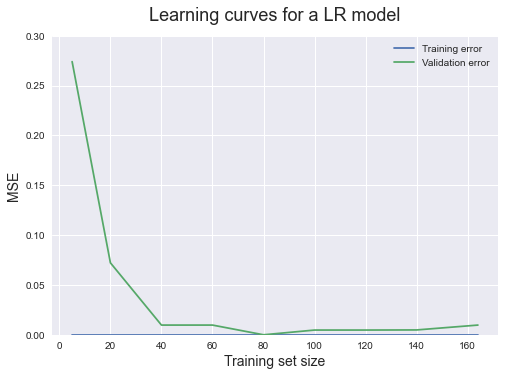

In [45]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a LR model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,0.3)

One thing of the note is that the training score for all the different training sizes is 0. This either means that the model is able to fit and predict perfectly while in training mode or there was some sort of human error in the process of outputting the scores.  Based on a quick research I have done the training score should not be zero and as the training set size increases the number of error should also increase (even if slightly). Since I could not find the error that might have set the training error scores to zero, I will assume that this model is fitting the data perfectly. 

The learning curve further supports the previous discussion an we can see that  as the size of the training set increases the number of errors that model makes when making predictions for the validation set decreases, suggesting that model is improving at generalizing the data for the validation examples. The number of error in validation mode reaches 0 when the training size is around 80 and starts increasing slightly afterwards. Assuming that the training error is correct and since the two training and validation lines do not converge, increasing data points for training might be useful. 

Since both training and validation errors are low and the gap between the two is narrow, we can conclude that as the training set size increases, we have a model with lower bias and variance meaning our model has the optimum complexity. 

In [46]:
joblib.dump(cv.best_estimator_, 'LR_model.pkl')

['LR_model.pkl']

### **Support Vector Machine (SVM)**

#### Hyperparameter Tuning: C & Kernel

In [47]:
svc = SVC()
parameters = { # used to search for the hyperparameters
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5) # cv = 5 --> 5 fold validation
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.99 (+/-0.024) for {'C': 0.1, 'kernel': 'linear'}
0.748 (+/-0.021) for {'C': 0.1, 'kernel': 'rbf'}
0.985 (+/-0.039) for {'C': 1, 'kernel': 'linear'}
0.748 (+/-0.048) for {'C': 1, 'kernel': 'rbf'}
0.99 (+/-0.039) for {'C': 10, 'kernel': 'linear'}
0.743 (+/-0.049) for {'C': 10, 'kernel': 'rbf'}


Based on the above values, we can see that kernel has a great impact on the performance of the model and linear kernel is doing relatively better than rbf suggesting that our data is linearly separable. We can also see that the performance of the three values of C are fairly similar with minor difference but overall the linear kernel with C = 0.1 has the best performance with 99% performance rate. 

In [48]:
cv.best_estimator_

SVC(C=0.1, kernel='linear')

#### Learning Curve

In [49]:
#citation 3
from sklearn.model_selection import learning_curve
# the training data is 60% of the whole data --> 206
# we are doing 5-fold cross validation with 80% training set and 20% validation set:
# 206 training example : 80% training (164) 20% validation (42) in cross validation
train_sizes = [5, 20, 40, 60, 80, 100, 120, 140, 164]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = SVC(C=0.1, kernel='linear'),
X = tr_features,
y = tr_labels.values.ravel(), train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [50]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 5     -0.000000
20     0.040000
40     0.025000
60     0.020000
80     0.015000
100    0.004000
120    0.003333
140    0.004286
164    0.003659
dtype: float64

 --------------------

Mean validation scores

 5      0.343670
20     0.125784
40     0.082578
60     0.063066
80     0.048664
100    0.058188
120    0.019164
140    0.009640
164    0.009640
dtype: float64


When the  model is training with very small size of the training set (5) we can see that it makes 0 errors and as the the training set size increases the errors model make also changes and starts to decrease. When the model is being tested on the validation set we can see that for small size of the training set it makes many errors. This is most  likely due to model's inability to make generalization. As the training set size increases we can see that model is making less and less errors suggesting that model is improving in make generalization and fitting and predicting new data points. 

(0.0, 0.4)

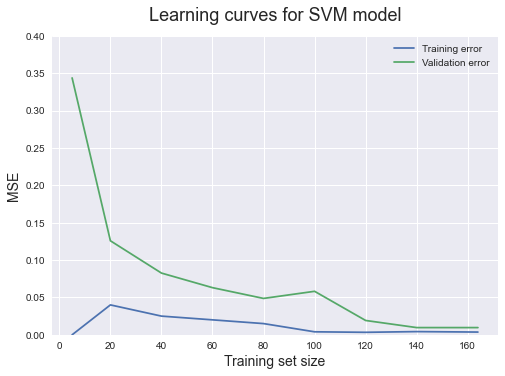

In [51]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for SVM model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,0.4)

The learning curve plot further supports out finding. Up to size 120, both training and validation errors decrease but there is a fairly big gap between the two lines suggesting that we are dealing with low bias and high variance. However when the training set size reaches 140, this gap considerably narrows down, indicating that our model has a low variance. Also after 140 point, there is not much change in either validation or training error meaning that adding more  data points to the training  wont improve the model's performance significantly. 

having a low bias and variance indicates that our model has optimum complexity 

In [52]:
# writing out the model
joblib.dump(cv.best_estimator_, 'SVM_model.pkl')

['SVM_model.pkl']

### **Multi Layered Perceptron (MLP)**

In [53]:
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

#### Hyperparameter tuning: hidden_layer_sizes, Activation, learning_rate

In [54]:
mlp = MLPClassifier(max_iter = 2500)
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}

0.399 (+/-0.237) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.365 (+/-0.158) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.34 (+/-0.28) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.5 (+/-0.261) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.344 (+/-0.231) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.389 (+/-0.109) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.379 (+/-0.061) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.407 (+/-0.148) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.349 (+/-0.113) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learn

We can see that logistic activation generally results in higher performance. Together with hidden layer size of 100 and constant learning rate the MLP model has the performance of 87.8%. 

In [55]:
cv.best_estimator_

MLPClassifier(activation='logistic', max_iter=2500)

#### Learning Curve

In [56]:
#citation 3
from sklearn.model_selection import learning_curve
# the training data is 60% of the whole data --> 206
# we are doing 5-fold cross validation with 80% training set and 20% validation set:
# 206 training example : 80% training (164) 20% validation (42) in cross validation
train_sizes = [5, 20, 40, 60, 80, 100, 120, 140, 164]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = MLPClassifier(activation='logistic', hidden_layer_sizes=100, learning_rate='invscaling', max_iter=2500),
X = tr_features,
y = tr_labels.values.ravel(), train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [57]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 5      0.240000
20     0.480000
40     0.725000
60     0.336667
80     1.315000
100    0.438000
120    0.648333
140    0.091429
164    0.712195
dtype: float64

 --------------------

Mean validation scores

 5      0.713240
20     0.750174
40     0.824158
60     0.341347
80     1.318815
100    0.390012
120    0.658420
140    0.097445
164    0.694425
dtype: float64


We cannot see any clear pattern from the number except that error rates are oscillating quite a lot. This might be because our dataset is quite small and MLP is not suitable for small amount of data and mostly used for larger data. 

(0.0, 2.0)

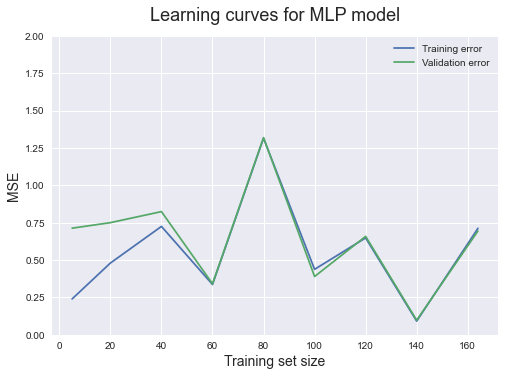

In [58]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for MLP model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,2)

the plot show that both training and validation error scores are following the same pattern. Neither of them is decreasing therefore the model has high bias. However both training and validation are following the same pattern and the gap between them is small. This suggests two things. First, the model has low variance and second adding extra data point will not help the model to improve and make better prediction meaning that the MLP is not suitable for our problem and we should consider other algorithms. 

Since MLP model has high bias and low variance we can conclude that this model is under fitting our data. 

In [129]:
joblib.dump(cv.best_estimator_, 'MLP_model.pkl')

['MLP_model.pkl']

### **RF**

In [65]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

#### Hyperparameter tuning: n_estimators, max_depth

In [67]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 250}

0.952 (+/-0.043) for {'max_depth': 2, 'n_estimators': 5}
0.966 (+/-0.023) for {'max_depth': 2, 'n_estimators': 50}
0.971 (+/-0.019) for {'max_depth': 2, 'n_estimators': 250}
0.976 (+/-0.03) for {'max_depth': 4, 'n_estimators': 5}
0.976 (+/-0.03) for {'max_depth': 4, 'n_estimators': 50}
0.976 (+/-0.03) for {'max_depth': 4, 'n_estimators': 250}
0.981 (+/-0.036) for {'max_depth': 8, 'n_estimators': 5}
0.981 (+/-0.036) for {'max_depth': 8, 'n_estimators': 50}
0.986 (+/-0.038) for {'max_depth': 8, 'n_estimators': 250}
0.971 (+/-0.019) for {'max_depth': 16, 'n_estimators': 5}
0.981 (+/-0.036) for {'max_depth': 16, 'n_estimators': 50}
0.976 (+/-0.03) for {'max_depth': 16, 'n_estimators': 250}
0.976 (+/-0.043) for {'max_depth': 32, 'n_estimators': 5}
0.981 (+/-0.036) for {'max_depth': 32, 'n_estimators': 50}
0.981 (+/-0.036) for {'max_depth': 32, 'n_estimators': 250}
0.947 (+/-0.056) for {'max_depth': None, 'n_estimators': 5}
0.981 (+/-0.036)

both n_estimator parameter and max_depth are affecting the performance of mode with n-estimators having a greater effect. When max_depth = 8 and there are 250 estimators, the model achieves its highest performance of 98.6%

In [68]:
cv.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=250)

#### Learning Curve

In [69]:
#citation 3
from sklearn.model_selection import learning_curve
# the training data is 60% of the whole data --> 206
# we are doing 5-fold cross validation with 80% training set and 20% validation set:
# 206 training example : 80% training (164) 20% validation (42) in cross validation
train_sizes = [5, 20, 40, 60, 80, 100, 120, 140, 164]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = RandomForestClassifier(max_depth=8, n_estimators=250),
X = tr_features,
y = tr_labels.values.ravel(), train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [70]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 5     -0.0
20    -0.0
40    -0.0
60    -0.0
80    -0.0
100   -0.0
120   -0.0
140   -0.0
164   -0.0
dtype: float64

 --------------------

Mean validation scores

 5      0.255981
20     0.057840
40     0.057840
60     0.028920
80     0.038676
100    0.043554
120    0.019280
140    0.019280
164    0.014402
dtype: float64


When in training, the model is able to fit and predict the data perfectly regardless of the data size. when tested on the validation set we can see that for the smaller size of training set, the models make many errors suggesting that the model is unable to make generalizations. As the size of the training size increases, the errors the model makes decreases indicating that the model is improving and is making more precise predictions. 

(0.0, 0.4)

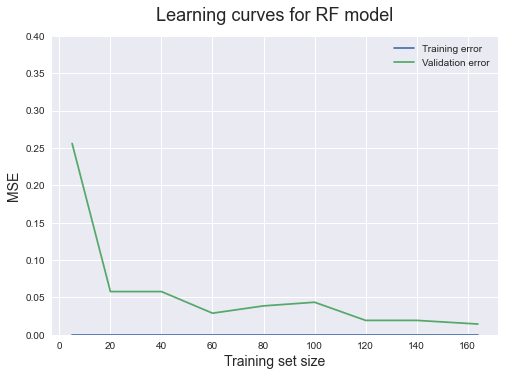

In [71]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for RF model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,0.4)

The plot also support our findings. Furthermore the low value of training error suggests that our model has low bias. However since the gap between the training and validation error is high, our model has a high variance compared to previous models. Since both lines remain different from each other and don't follow the same pattern, increasing the number of data point in our training might improve the model's  performance and it is one thing that we should consider.  

the high variance and low bias suggest that RF model is over fitting our data

In [72]:
joblib.dump(cv.best_estimator_, 'RF_model.pkl')

['RF_model.pkl']

### **Boosting**

#### Hyperparameter tuning: n-estimators, max_depth, & learning_rate Tuning

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 5}

0.427 (+/-0.022) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.917 (+/-0.05) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.966 (+/-0.023) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.981 (+/-0.036) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.427 (+/-0.022) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.981 (+/-0.036) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.981 (+/-0.036) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.981 (+/-0.036) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.427 (+/-0.022) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.961 (+/-0.05) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.971 (+/-0.036) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.971 (+/-0.036) for {'learning_rate': 

overall the model has the best performance (98.5%) with learning rate of 1, max_depth of 3 and 5 estimators. 

In [74]:
cv.best_estimator_

GradientBoostingClassifier(learning_rate=1, n_estimators=5)

#### Learning Curve

In [75]:
#citation 3
from sklearn.model_selection import learning_curve
# the training data is 60% of the whole data --> 206
# we are doing 5-fold cross validation with 80% training set and 20% validation set:
# 206 training example : 80% training (164) 20% validation (42) in cross validation
train_sizes = [5, 20, 40, 60, 80, 100, 120, 140, 164]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = GradientBoostingClassifier(learning_rate=1, max_depth = 3, n_estimators=5),
X = tr_features,
y = tr_labels.values.ravel(), train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [76]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 5     -0.0
20    -0.0
40    -0.0
60    -0.0
80    -0.0
100   -0.0
120   -0.0
140   -0.0
164   -0.0
dtype: float64

 --------------------

Mean validation scores

 5      0.503833
20     0.169570
40     0.082230
60     0.076887
80     0.038792
100    0.038792
120    0.057840
140    0.067480
164    0.024274
dtype: float64


0 training error suggest the model is able to fit and predict while being trained regardless of training set size. While being tested on the validation set, the model makes many errors for smaller sizes since it is unable of making generalization. As the size increase we can see that the model make less errors suggesting that it is getting better at making predictions. 

(0.0, 0.6)

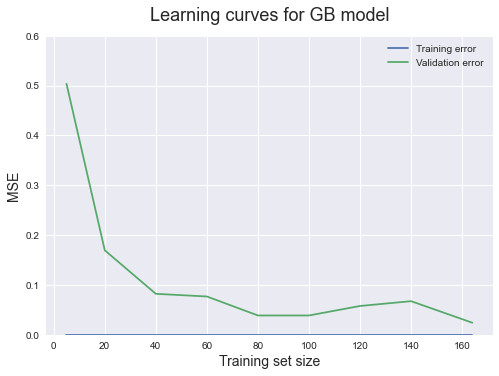

In [77]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for GB model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,0.6)

 The model has the lowest bias and variance when the training set size is set to 100. overall the model has a low bias but since the gap between training and validation is higher than other models, this model has higher variance. This means that the models is over fitting. 

Finally, since the training and validation set lines continue to differ and do not converge or become constant, we can conclude that adding more data points in training will most likely improve the model significantly. 

In [78]:
joblib.dump(cv.best_estimator_, 'GB_model.pkl')

['GB_model.pkl']

### **Model comparison**

#### Read in Data

In [79]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv')

te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv')

#### Read in Models

In [80]:
models = {}

for mdl in ['LR', 'SVM', 'MLP', 'RF', 'GB']:
    models[mdl] = joblib.load('{}_model.pkl'.format(mdl))

In [81]:
models

{'LR': LogisticRegression(C=100, max_iter=3000),
 'SVM': SVC(C=0.1, kernel='linear'),
 'MLP': MLPClassifier(activation='logistic', max_iter=2500),
 'RF': RandomForestClassifier(max_depth=8, n_estimators=250),
 'GB': GradientBoostingClassifier(learning_rate=1, n_estimators=5)}

#### Evaluate models on the validation set

In [82]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    latency = round((end - start)*1000, 1)
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='macro'), 3)
    recall = round(recall_score(labels, pred, average='macro'), 3)
    print('{} --> Accuracy= {} | Precision= {} | Recall= {} | Latency= {}ms'.format(name, accuracy, precision, recall, latency ))

In [83]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

LR --> Accuracy= 0.986 | Precision= 0.987 | Recall= 0.99 | Latency= 1.0ms
SVM --> Accuracy= 0.986 | Precision= 0.99 | Recall= 0.972 | Latency= 0.8ms
MLP --> Accuracy= 0.681 | Precision= 0.454 | Recall= 0.56 | Latency= 1.0ms
RF --> Accuracy= 0.986 | Precision= 0.974 | Recall= 0.99 | Latency= 21.0ms
GB --> Accuracy= 0.986 | Precision= 0.974 | Recall= 0.99 | Latency= 1.0ms


C:\Users\elmir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the result above we can see that MLP with the accuracy of 46.4% is worst algorithm for the purpose of our project. From our discussion on the Learning curve of the algorithm, this was expected. We also discussed how MLP is underfitting while RF and GB are overfitting our data Leaving only LR and SVM. 

The other 4 algorithm have the same accuracy of 98.6%. Therefore we have to consider the precision/ recall trade off. 

In our project false negative is when model labels an example negative for belonging to one of the species while the example actually belongs to that species and false positive is when model predicts an example's species while it does not belong to that species. In this case having a false positive is worse than false negative (it is worse for model to say a penguin belongs to a certain species and it doesn't than to say a penguin doesn't belong to a species when in fact it does) therefore precision has higher priority than recall. 

that being said, the SVM with accuracy of 98.6% , precision of 99%, recall of 97.2% and latency of 0.8ms is the best model to predict the species of the penguins. Coming second is LR model with the same accuracy, precision of 98.7% and recall 99%. Additionally since our dataset is quite small, SVM would be more suitable to use than other models. In the next step, we are going to run our model on testing set to investigate our hypothesis's correctness. 

#### Evaluate models on test set

In [84]:
for name, mdl in models.items():
    evaluate_model(name, mdl, te_features, te_labels)

LR --> Accuracy= 0.986 | Precision= 0.987 | Recall= 0.99 | Latency= 2.0ms
SVM --> Accuracy= 0.986 | Precision= 0.99 | Recall= 0.987 | Latency= 1.5ms
MLP --> Accuracy= 0.623 | Precision= 0.415 | Recall= 0.515 | Latency= 1.0ms
RF --> Accuracy= 0.971 | Precision= 0.964 | Recall= 0.976 | Latency= 21.0ms
GB --> Accuracy= 0.971 | Precision= 0.964 | Recall= 0.976 | Latency= 1.0ms


C:\Users\elmir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


After running the model on the test set, we can see that the accuracy score dropped for RF and GB models making LR and SVM models with highest accuracy. Both models maintained the same precision but their latency almost doubled. furthermore, the Recall of the SVM model increase to 98.7% while the recall of LR remained same. Since there are no significant improvement in LR model, We can confidently say that when splitting data 60-20-20, SVM model is the best model with accuracy of 98.6%, precision of 99%, recall of 98.7% and latency of 1.5 ms. 

in the next section we are going to explore the models performance with split ratio of 80:10:10 


## **Part IV: Splitting data 80-10-10**

### Reading cleaned data

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('penguins_cleaned.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,1,39.10000,18.70000,181.000000,3750.000000
1,0,1,39.50000,17.40000,186.000000,3800.000000
2,0,1,40.30000,18.00000,195.000000,3250.000000
3,0,1,43.92193,17.15117,200.915205,4201.754386
4,0,1,36.70000,19.30000,193.000000,3450.000000


### Splitting data:

In [86]:
features = data.drop('species', axis=1)
labels = data['species']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [87]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.8
0.1
0.1


Saving the three datasets:

In [88]:
X_train.to_csv('train_features2.csv', index=False)
X_val.to_csv('val_features2.csv', index=False)
X_test.to_csv('test_features2.csv', index=False)

y_train.to_csv('train_labels2.csv', index=False)
y_val.to_csv('val_labels2.csv', index=False)
y_test.to_csv('test_labels2.csv', index=False)

### **Logistic regression algorithm:**

In [89]:
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV # used for tuning algorithms and hyperparameters
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features2.csv')
tr_labels = pd.read_csv('train_labels2.csv')


#### Hyperparameter tuning: C

In [90]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [97]:
lr = LogisticRegression(max_iter=4500)
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 1}

0.905 (+/-0.048) for {'C': 0.001}
0.967 (+/-0.036) for {'C': 0.01}
0.978 (+/-0.036) for {'C': 0.1}
0.982 (+/-0.04) for {'C': 1}
0.978 (+/-0.053) for {'C': 10}
0.982 (+/-0.04) for {'C': 100}
0.982 (+/-0.04) for {'C': 1000}


With C = 1 the model being trained on 80% of the dataset has the performance of 98.2%  which is less than performance rate of when model was being trained on 60% of the dataset proving our hypothesis from the previous section on how increasing the data point in the training set will not improve the model's performance. 

In [98]:
cv.best_estimator_

LogisticRegression(C=1, max_iter=4500)

#### Learning Curve:

In [99]:
#citation 3
from sklearn.model_selection import learning_curve
# the training data is 80% of the whole data --> 275
# we are doing 5-fold cross validation with 80% training set and 20% validation set:
# 275 training example : 80% training (220) 20% validation (55) in cross validation
train_sizes = [5, 50, 100, 150, 200, 220]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LogisticRegression(C=1, max_iter=4500),
X = tr_features,
y = tr_labels.values.ravel(), train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [100]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 5     -0.000000
50    -0.000000
100   -0.000000
150   -0.000000
200   -0.000000
220    0.000909
dtype: float64

 --------------------

Mean validation scores

 5      0.843636
50     0.036364
100    0.047273
150    0.021818
200    0.047273
220    0.040000
dtype: float64


As when we split 60:20:20, We can see the model is able to fit and predict perfectly when in training regardless of the training set size. Except when the training set size is at its highest (220) where model makes some error. This is probably the reason why the overall model performance  is lower than when the split ration was 60:20:20. 

The model follows the same pattern as last time when being tested in validation mode, making more errors because of its inability to make correct prediction due to small training size and improving as the training size increases. 

(0.0, 1.0)

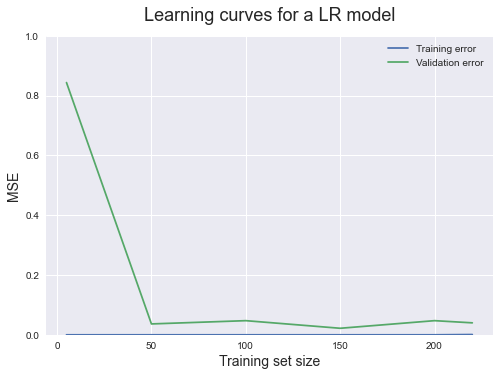

In [101]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a LR model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1)

The learning curve further support our findings. Additionally we can see that the model still has a low bias but it has a higher variance than previous split ratio. So even though the model has optimum complexity it slightly shifts towards over fitting in compared to previous LR model. 

In [103]:
joblib.dump(cv.best_estimator_, 'LR_model2.pkl')

['LR_model2.pkl']

### **Support Vector Machine (SVM)**

In [104]:
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV # used for tuning algorithms and hyperparameters
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features2.csv')
tr_labels = pd.read_csv('train_labels2.csv')


#### C & Kernel tuning

In [105]:
svc = SVC()
parameters = { # used to search for the hyperparameters
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5) # cv = 5 --> 5 fold validation
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.989 (+/-0.018) for {'C': 0.1, 'kernel': 'linear'}
0.745 (+/-0.065) for {'C': 0.1, 'kernel': 'rbf'}
0.982 (+/-0.023) for {'C': 1, 'kernel': 'linear'}
0.742 (+/-0.084) for {'C': 1, 'kernel': 'rbf'}
0.985 (+/-0.027) for {'C': 10, 'kernel': 'linear'}
0.745 (+/-0.076) for {'C': 10, 'kernel': 'rbf'}


Based on the above values, we can see that kernel has a great impact on the performance of the model and linear kernel is doing relatively better than rbf suggesting that our data is linearly separable. We can also see that the performance of the three values of C are fairly similar with minor difference but overall the linear kernel with C = 0.1 has the best performance with 98.9% performance rate which is slightly lower than when model was trained on 60:20:20 ratio. 

This decrease in supports our hypothesis that further increasing the data point in the training will not improve the SVM model's performance. As a matter of fact, it decrease the performance. 

In [107]:
cv.best_estimator_

SVC(C=0.1, kernel='linear')

#### Learning Curve

In [108]:
#citation 3
from sklearn.model_selection import learning_curve
# the training data is 80% of the whole data --> 275
# we are doing 5-fold cross validation with 80% training set and 20% validation set:
# 275 training example : 80% training (220) 20% validation (55) in cross validation
train_sizes = [5, 50, 100, 150, 200, 220]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = SVC(C=0.1, kernel='linear'),
X = tr_features,
y = tr_labels.values.ravel(), train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [109]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 5     -0.000000
50     0.016000
100    0.040000
150    0.026667
200    0.023000
220    0.020909
dtype: float64

 --------------------

Mean validation scores

 5      0.843636
50     0.094545
100    0.036364
150    0.021818
200    0.021818
220    0.021818
dtype: float64


As in the last split ratio, the model is able to make prefect fitting and prediction when the training set has the size of 5. However it has high errors when being tested on validation set indicating that model is unable to make generalization when the training set size is too small. As the training set size increase the model makes more error while training but makes better predictions when being tested on the validation set. 

one thing of note is when size  = 150, the training error is 2.67% while the validation error is 2.18%. This pattern continues for the larger training set, further supporting our hypothesis that the increasing the training data for SVM model not only does not improve the model but in fact impacts its performance negatively. 

(0.0, 1.0)

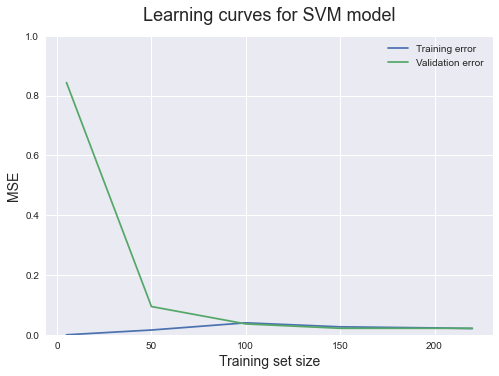

In [111]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for SVM model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1)

In the plot we can see that training error is quite low suggesting that our model has low bias. Since the gap between training error and validation error is quite low (and might be negative is some places) therefore, our model also has low variance.

This suggest that our model has optimum complexity with a slight shift towards underfitting compared to previous SVM model. 

In [112]:
# writing out the model
joblib.dump(cv.best_estimator_, 'SVM_model2.pkl')

['SVM_model2.pkl']

### **MLP**

In [121]:
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features2.csv')
tr_labels = pd.read_csv('train_labels2.csv')

#### Hyperparameter tuning: hidden_layer_sizes, activation, learning_rate

In [122]:
mlp = MLPClassifier(max_iter = 2500)
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}

0.364 (+/-0.188) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.4 (+/-0.26) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.262 (+/-0.232) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.375 (+/-0.224) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.422 (+/-0.334) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.462 (+/-0.235) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.404 (+/-0.302) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.451 (+/-0.363) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.371 (+/-0.305) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'lear

Same as previous split ratio, logistic activation generally results in higher performance. Together with hidden layer size of 100 and constant learning rate, for the split ratio of 80:10:10,  the MLP model has the performance of 71.6% which is quite lower than model's performance in the previous section. As we discussed in the previous section, the MLP model is not very suitable for our problem and increasing the training data point will not make any difference at this time. 

the only thing that might improve the model's performance is to gather more data (e.g., instead of 344 we need like 1000 data point)

In [124]:
cv.best_estimator_

MLPClassifier(activation='logistic', max_iter=2500)

#### Learning Curve

In [125]:
#citation 3
from sklearn.model_selection import learning_curve
# the training data is 80% of the whole data --> 275
# we are doing 5-fold cross validation with 80% training set and 20% validation set:
# 275 training example : 80% training (220) 20% validation (55) in cross validation
train_sizes = [5, 50, 100, 150, 200, 220]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = MLPClassifier(activation='logistic', max_iter=2500),
X = tr_features,
y = tr_labels.values.ravel(), train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [126]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 5      0.480000
50     0.712000
100    1.408000
150    0.634667
200    0.973000
220    0.563636
dtype: float64

 --------------------

Mean validation scores

 5      0.930909
50     0.745455
100    1.418182
150    0.654545
200    0.974545
220    0.669091
dtype: float64


(0.0, 2.0)

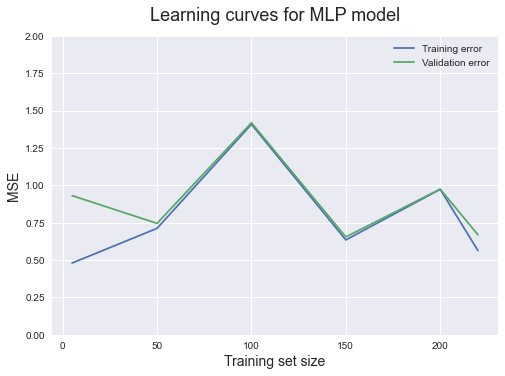

In [127]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for MLP model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,2)

expect at the smallest and largest training set sizes, the model is making the same amount of error while using both training and validation set suggesting that model is not improving at all as the size changes. Since the error is high, the model has a high bias and because the error scores for both training and validation are close to each other low variance meaning the model is under fitting the data. 

In [128]:
joblib.dump(cv.best_estimator_, 'MLP_model2.pkl')

['MLP_model2.pkl']

### **RF**

In [149]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features2.csv')
tr_labels = pd.read_csv('train_labels2.csv')

#### Hyperparameter tuning: n-estimators, max-depth

In [150]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 32, 'n_estimators': 250}

0.931 (+/-0.106) for {'max_depth': 2, 'n_estimators': 5}
0.967 (+/-0.015) for {'max_depth': 2, 'n_estimators': 50}
0.967 (+/-0.027) for {'max_depth': 2, 'n_estimators': 250}
0.949 (+/-0.081) for {'max_depth': 4, 'n_estimators': 5}
0.971 (+/-0.037) for {'max_depth': 4, 'n_estimators': 50}
0.971 (+/-0.018) for {'max_depth': 4, 'n_estimators': 250}
0.96 (+/-0.027) for {'max_depth': 8, 'n_estimators': 5}
0.971 (+/-0.037) for {'max_depth': 8, 'n_estimators': 50}
0.978 (+/-0.042) for {'max_depth': 8, 'n_estimators': 250}
0.971 (+/-0.037) for {'max_depth': 16, 'n_estimators': 5}
0.971 (+/-0.018) for {'max_depth': 16, 'n_estimators': 50}
0.975 (+/-0.044) for {'max_depth': 16, 'n_estimators': 250}
0.978 (+/-0.036) for {'max_depth': 32, 'n_estimators': 5}
0.978 (+/-0.042) for {'max_depth': 32, 'n_estimators': 50}
0.982 (+/-0.033) for {'max_depth': 32, 'n_estimators': 250}
0.967 (+/-0.027) for {'max_depth': None, 'n_estimators': 5}
0.971 (+/-0.

both n_estimator parameter and max_depth are affecting the performance of model with n-estimators having a greater effect. When max_depth = 32 and there are 250 estimators, the model achieves its highest performance of 98.2%

In [151]:
cv.best_estimator_

RandomForestClassifier(max_depth=32, n_estimators=250)

#### learning curve

In [152]:
#citation 3
from sklearn.model_selection import learning_curve
# the training data is 80% of the whole data --> 275
# we are doing 5-fold cross validation with 80% training set and 20% validation set:
# 275 training example : 80% training (220) 20% validation (55) in cross validation
train_sizes = [5, 50, 100, 150, 200, 220]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = RandomForestClassifier(max_depth=8, n_estimators=250),
X = tr_features,
y = tr_labels.values.ravel(), train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [153]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 5     -0.0
50    -0.0
100   -0.0
150   -0.0
200   -0.0
220   -0.0
dtype: float64

 --------------------

Mean validation scores

 5      0.276364
50     0.072727
100    0.061818
150    0.050909
200    0.032727
220    0.047273
dtype: float64


like previous model The validation error is high for the smaller set as it should and as the model starts making better generalization as the training size increases, the validation error gradually decreases however when the sample size exceeds 200 the validation starts increasing than decreasing. 

(0.0, 0.5)

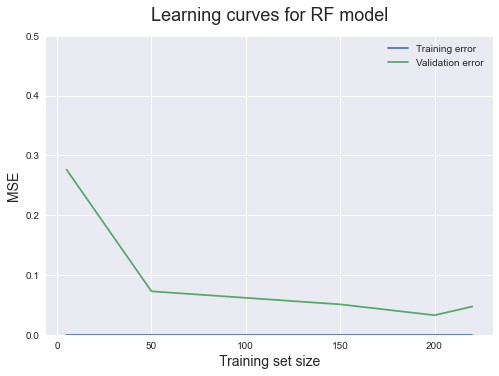

In [155]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for RF model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,0.5)

As discussed previously, the RF model overfits our data the slight increase increase in bias and variance does not change this fact however there is a possibility that gather more actual data and increasing the overall size of our dataset might improve this model's performance. But for the current situation, this model is not suitable to solve our problem. 

In [156]:
joblib.dump(cv.best_estimator_, 'RF_model2.pkl')

['RF_model2.pkl']

### **Boosting**

#### Hyperparameter Tunning: n-estimators, max_depth, & learning_rate Tuning

In [157]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 50}

0.436 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.938 (+/-0.037) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.956 (+/-0.037) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.967 (+/-0.027) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.436 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.975 (+/-0.018) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.975 (+/-0.018) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.971 (+/-0.018) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.436 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.975 (+/-0.037) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.971 (+/-0.037) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.971 (+/-0.037) for {'learning_rate': 0.0

overall the model has the best performance (98.2%) with learning rate of 1, max_depth of 3 and 50 estimators which is slightly lower than the GB model in the previous split ratio. 

In [158]:
cv.best_estimator_

GradientBoostingClassifier(learning_rate=1, n_estimators=50)

#### Learning Curve

In [159]:
#citation 3
from sklearn.model_selection import learning_curve
# the training data is 80% of the whole data --> 275
# we are doing 5-fold cross validation with 80% training set and 20% validation set:
# 275 training example : 80% training (220) 20% validation (55) in cross validation
train_sizes = [5, 50, 100, 150, 200, 220]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = GradientBoostingClassifier(learning_rate=1, n_estimators=50),
X = tr_features,
y = tr_labels.values.ravel(), train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [160]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 5     -0.0
50    -0.0
100   -0.0
150   -0.0
200   -0.0
220   -0.0
dtype: float64

 --------------------

Mean validation scores

 5      0.363636
50     0.152727
100    0.047273
150    0.061818
200    0.036364
220    0.029091
dtype: float64


(0.0, 0.6)

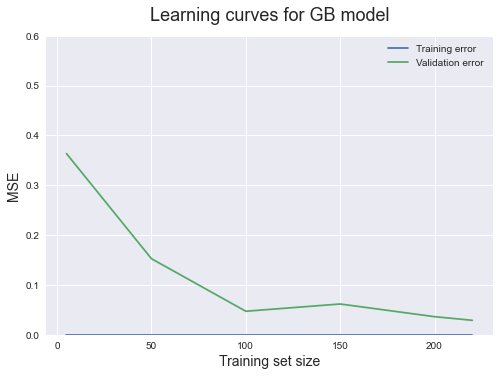

In [161]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for GB model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,0.6)

Compare to the GB model from the previous split, the model has slightly higher variance suggesting that even when increasing the data point in the training set, GB model still overfits the data and not suitable to solve our problem

In [162]:
joblib.dump(cv.best_estimator_, 'GB_model2.pkl')

['GB_model2.pkl']

### **Model comparison**

#### Read in Data

In [163]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features = pd.read_csv('val_features2.csv')
val_labels = pd.read_csv('val_labels2.csv')

te_features = pd.read_csv('test_features2.csv')
te_labels = pd.read_csv('test_labels2.csv')

#### Read in Models

In [164]:
models = {}

for mdl in ['LR', 'SVM', 'MLP', 'RF', 'GB']:
    models[mdl] = joblib.load('{}_model2.pkl'.format(mdl))

In [165]:
models

{'LR': LogisticRegression(C=1, max_iter=4500),
 'SVM': SVC(C=0.1, kernel='linear'),
 'MLP': MLPClassifier(activation='logistic', max_iter=2500),
 'RF': RandomForestClassifier(max_depth=32, n_estimators=250),
 'GB': GradientBoostingClassifier(learning_rate=1, n_estimators=50)}

#### Evaluate models on the validation set

In [166]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    latency = round((end - start)*1000, 1)
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='macro'), 3)
    recall = round(recall_score(labels, pred, average='macro'), 3)
    print('{} --> Accuracy= {} | Precision= {} | Recall= {} | Latency= {}ms'.format(name, accuracy, precision, recall, latency ))

In [167]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

LR --> Accuracy= 1.0 | Precision= 1.0 | Recall= 1.0 | Latency= 1.0ms
SVM --> Accuracy= 1.0 | Precision= 1.0 | Recall= 1.0 | Latency= 2.0ms
MLP --> Accuracy= 0.971 | Precision= 0.972 | Recall= 0.982 | Latency= 1.5ms
RF --> Accuracy= 0.971 | Precision= 0.972 | Recall= 0.982 | Latency= 21.0ms
GB --> Accuracy= 0.971 | Precision= 0.972 | Recall= 0.982 | Latency= 2.0ms


We can see that with the new split ratio, the overall accuracy score increased for all algorithms. The precision and recall increased for LR, SVM, and MLP while it decreased slightly for RF and GB. Based on this result again LR and SVM are both suitable for solving this problem with 100% accuracy, precision and recall scores. The only difference between the two model is in their latency where LR is twice as fast as SVM makeing it a better choice. 

evaluation result from 60:20:20

LR --> Accuracy= 0.986 | Precision= 0.987 | Recall= 0.99 | Latency= 1.0ms

SVM --> Accuracy= 0.986 | Precision= 0.99 | Recall= 0.972 | Latency= 0.8ms

MLP --> Accuracy= 0.681 | Precision= 0.454 | Recall= 0.56 | Latency= 1.0ms

RF --> Accuracy= 0.986 | Precision= 0.974 | Recall= 0.99 | Latency= 21.0ms

GB --> Accuracy= 0.986 | Precision= 0.974 | Recall= 0.99 | Latency= 1.0ms



#### evaluate models on test set

In [168]:
for name, mdl in models.items():
    evaluate_model(name, mdl, te_features, te_labels)

LR --> Accuracy= 1.0 | Precision= 1.0 | Recall= 1.0 | Latency= 2.0ms
SVM --> Accuracy= 0.971 | Precision= 0.976 | Recall= 0.97 | Latency= 1.0ms
MLP --> Accuracy= 0.941 | Precision= 0.944 | Recall= 0.944 | Latency= 1.0ms
RF --> Accuracy= 1.0 | Precision= 1.0 | Recall= 1.0 | Latency= 22.6ms
GB --> Accuracy= 0.971 | Precision= 0.976 | Recall= 0.97 | Latency= 2.0ms


by running the models on the test set we can see that LR and RF did better than rest of the models. However given the RF's lower scores when evaluating the model using validation set and it's tendency to overfit compared to LR during learning curve analysis, we can conclude that LR is best model when it comes to solving this problem with split ratio of 80:10:10

## **Part V: Conclusion**

When splitting the data 60:20:20 we found that SVM model is the best model with accuracy of 98.6%, precision of 99%, recall of 98.7% and latency of 1.5 ms and when splitting the data 80:10:10 we found that LR model with accuracy, precision, and recall of 100% and latency of 2 ms was the best model to solve our problem. During our learning curve analysis we noticed that model performance drops  slightly for the higher splitting ratio compare to the lower one. We also noted that the latency almost doubles when we have higher ratio. 

Deciding on which split ratio is better than other depends on few factors. If the accuracy and precision of the model is of concern then split ratio of 80:10:10 is better choice even though the computation is slightly more expensive and takes longer for the model to make prediction. However, if the responsive of the model is concerned (for example the model need to make prediction in real time) the 60:20:20 with SVM model would be a better fit. 